## Импорт библиотек

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import statsmodels

## Импорт набора данных

In [2]:
df = pd.read_csv('Data/AirPassengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Формирование формата данных в виде год-месяц-день

In [3]:
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexeddf=df.set_index(['Month'])

In [4]:
from datetime import datetime
indexeddf.tail(5)

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Построение графика по основной фиче

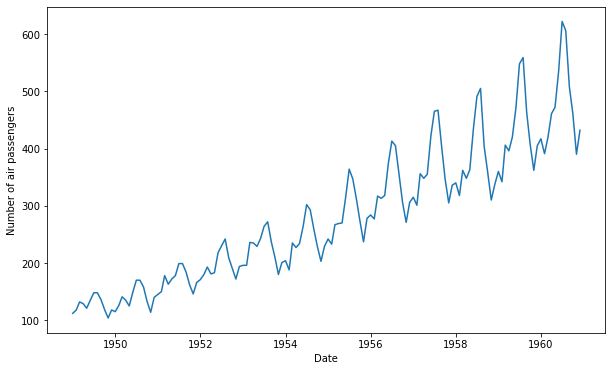

In [5]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(indexeddf)

## Формирование переменной со средней скользящей средней и переменной со стандартным оклонением

In [6]:
rolmean = indexeddf.rolling(window=12).mean()
rolstd = indexeddf.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]             Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


## Построение графика со скользящей средей и стандартным отклонением

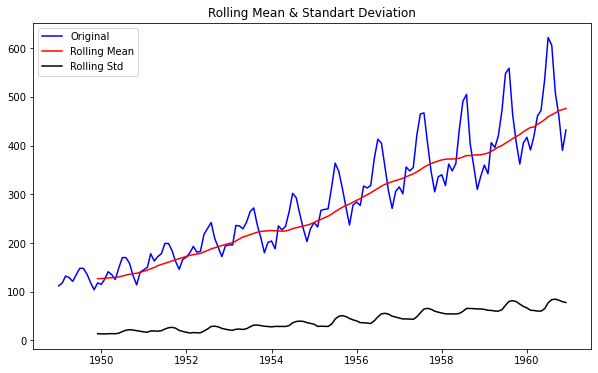

In [7]:
orig = plt.plot(indexeddf, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standart Deviation')
plt.show(block=False)

## Тест Дикки-Фуллера для определения стационарности

In [8]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexeddf['Passengers'], autolag ='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistics                 0.815369
p-value                         0.991880
Lags Used                      13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


## Логарифмирование переменной

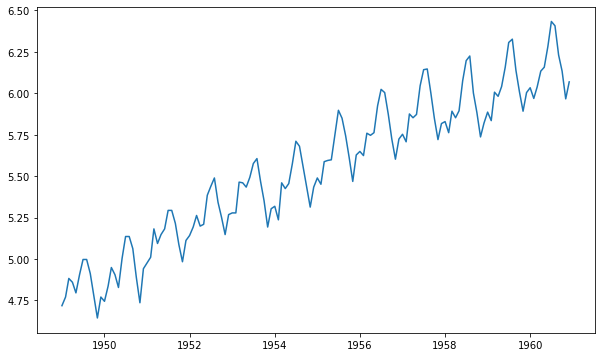

In [9]:
indexeddf_logScale = np.log(indexeddf)
plt.plot(indexeddf_logScale)

## Создание переменных - среднее скользящее средней логарифма и стандартного отклонения логарифма

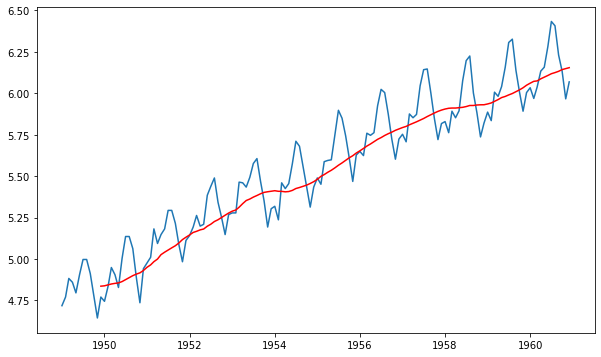

In [10]:
movingAverage = indexeddf_logScale.rolling(window=12).mean()
movingSTD = indexeddf_logScale.rolling(window=12).std()
plt.plot(indexeddf_logScale)
plt.plot(movingAverage, color='red')

## Тест Дикки-Фуллера прологарифмированной переменной

In [11]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest_2 = adfuller(indexeddf_logScale['Passengers'], autolag ='AIC')

dfoutput_2 = pd.Series(dftest_2[0:4], index=['Test Statistics','p-value','Lags Used','Number of Observation Used'])
for key,value in dftest_2[4].items():
    dfoutput_2['Critical Value (%s)'%key]=value
    
print(dfoutput_2)

Results of Dickey-Fuller Test:
Test Statistics                -1.717017
p-value                         0.422367
Lags Used                      13.000000
Number of Observation Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


## Декомпозиция переменной

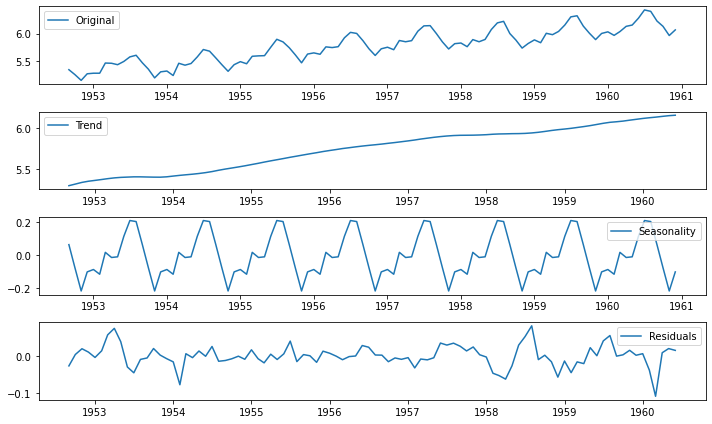

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexeddf_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Select the most recent weeks 
indexeddf_logScale_select = indexeddf_logScale[-100:]

plt.subplot(411)
plt.plot(indexeddf_logScale_select.index.to_pydatetime(), indexeddf_logScale_select.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(indexeddf_logScale_select.index.to_pydatetime(), trend[-100:].values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(indexeddf_logScale_select.index.to_pydatetime(), seasonal[-100:].values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(indexeddf_logScale_select.index.to_pydatetime(), residual[-100:].values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Переход в разницы 1-го порядка и построение графика

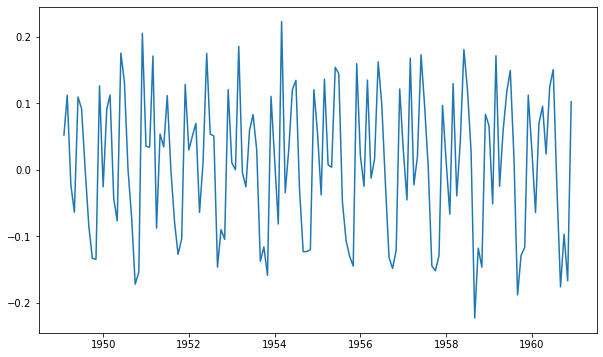

In [13]:
indexeddf_logScale_diff = indexeddf_logScale - indexeddf_logScale.shift()
plt.plot(indexeddf_logScale_diff.index.to_pydatetime(), indexeddf_logScale_diff.values)

## Расчет скользящего среднего и стандартного отклонения перемнной в разницах, тест Дикки-Фуллера на стационарность

In [14]:
def check_stationarity(timeseries):
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=12,center=False).mean() 
    rolling_std = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.index.to_pydatetime(), rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.index.to_pydatetime(), rolling_std.values, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dickey_fuller_test = adfuller(timeseries, autolag='AIC')
    dfresults = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)


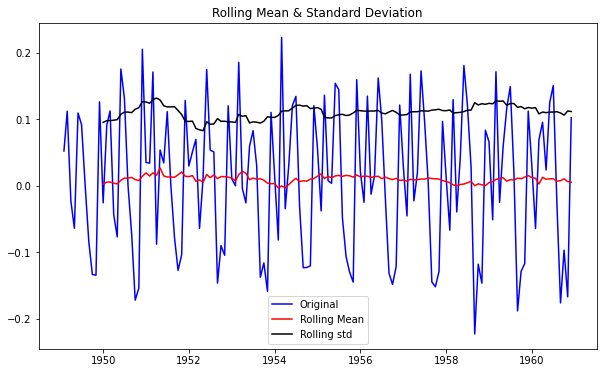

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [15]:
indexeddf_logScale_diff.dropna(inplace=True)
check_stationarity(indexeddf_logScale_diff)

## Графики для определения числа лагов в модели ARIMA

C:\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


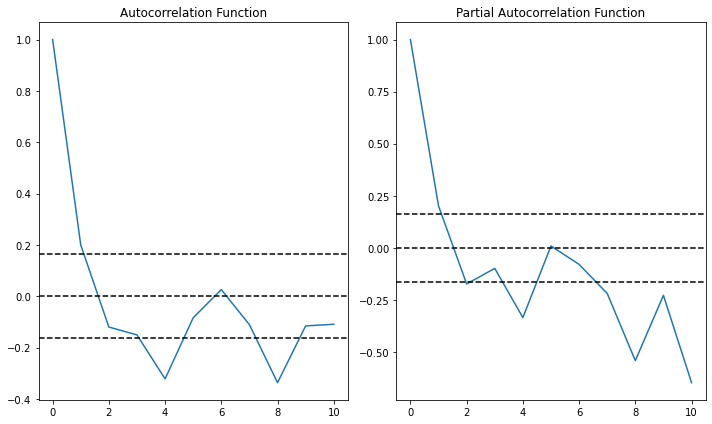

In [16]:
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf

#ACF and PACF plots

lag_auto_corr = acf(indexeddf_logScale_diff, nlags=10)
lag_par_auto_corr = pacf(indexeddf_logScale_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(indexeddf_logScale_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(indexeddf_logScale_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_par_auto_corr)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(indexeddf_logScale_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(indexeddf_logScale_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Модель ARIMA

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  89.869
Date:                Mon, 08 Nov 2021   AIC                           -175.737
Time:                        13:05:44   BIC                           -169.826
Sample:                    02-01-1949   HQIC                          -173.335
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2994      0.118     -2.534      0.011      -0.531      -0.068
sigma2         0.0165      0.002      7.976      0.000       0.012       0.021
Ljung-Box (L1) (Q):                   1.16   Jarque-

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


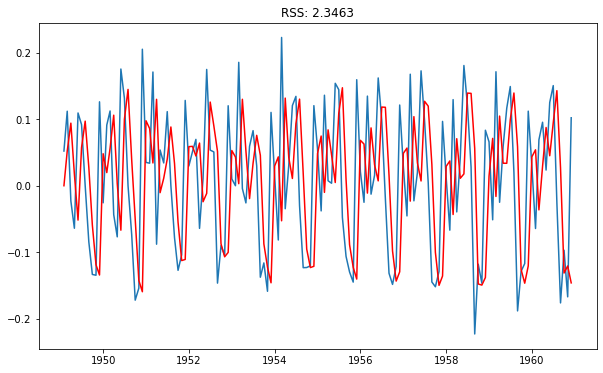

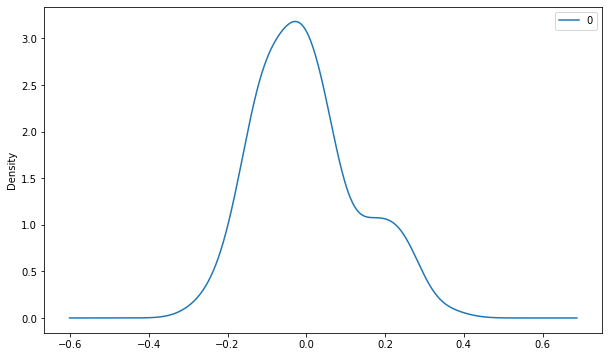

In [21]:
model = ARIMA(indexeddf_logScale_diff, order=(1, 1, 0))  
results_ARIMA = model.fit() 
plt.plot(indexeddf_logScale_diff.index.to_pydatetime(), indexeddf_logScale_diff.values)
plt.plot(indexeddf_logScale_diff.index.to_pydatetime(), results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-indexeddf_logScale_diff['Passengers'])**2))
# print(results_ARIMA.fittedvalues[1:])
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

# https://www.youtube.com/watch?v=e8Yw4alG16Q

## ссылка на использованный dataset https://www.kaggle.com/rakannimer/air-passengers